<a href="https://colab.research.google.com/github/rishiguptha/PoliticalSentimentAnalysis/blob/main/PoliticalSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Import library to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
tweets = pd.read_csv('/content/drive/MyDrive//PoliticalTweets.csv')
tweets.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [4]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = text.replace('amp', '')
    return text

In [5]:
tweets['CleanedTweet'] = tweets['Tweet'].apply(clean_text)
tweets.head()

,Party,Handle,Tweet,CleanedTweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...","Today, Senate Dems vote to SaveTheInternet. Pr..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,: Winter Haven resident / Alta Vista teacher i...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,: . noted that Hurricane Maria has left approx...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,: Meeting with . Thanks for taking the time t...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,: Hurricane season starts on June 1st; Puerto ...


In [6]:
def find_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def find_polarity(text):
    return TextBlob(text).sentiment.polarity

def classify_polarity(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

def classify_subjectivity(score):
    if score == 0:
        return 'Not Subjective'
    else:
        return 'Subjective'

In [7]:
tweets['Subjectivity'] = tweets['CleanedTweet'].apply(find_subjectivity)
tweets['Polarity'] = tweets['CleanedTweet'].apply(find_polarity)

In [8]:
tweets['Classify_S'] = tweets['Subjectivity'].apply(classify_subjectivity)
tweets['Classify_P'] = tweets['Polarity'].apply(classify_polarity)

In [9]:
tweets.head()

,Party,Handle,Tweet,CleanedTweet,Subjectivity,Polarity,Classify_S,Classify_P
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...","Today, Senate Dems vote to SaveTheInternet. Pr...",0.7,0.4,Subjective,Positive
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,: Winter Haven resident / Alta Vista teacher i...,0.0,0.0,Not Subjective,Neutral
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,: . noted that Hurricane Maria has left approx...,0.3,-0.2,Subjective,Negative
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,: Meeting with . Thanks for taking the time t...,0.2,0.2,Subjective,Positive
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,: Hurricane season starts on June 1st; Puerto ...,0.0,0.0,Not Subjective,Neutral


In [10]:
democract_tweets = tweets[tweets['Party'] == 'Democrat']
republican_tweets = tweets[tweets['Party'] == 'Republican']

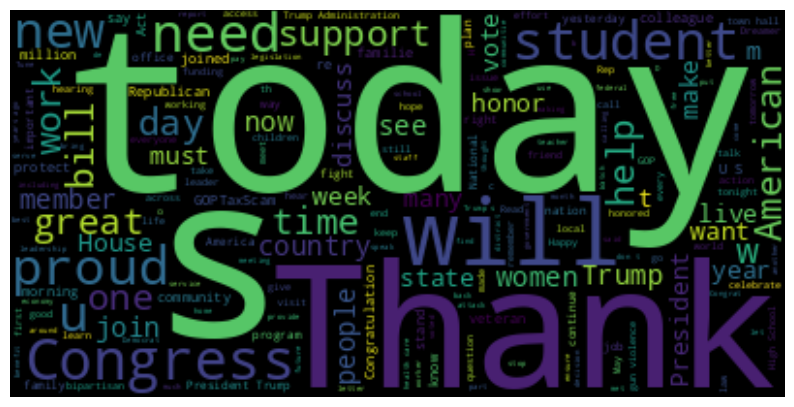

In [11]:
words = ' '.join([tweet for tweet in democract_tweets['CleanedTweet']])
word_cloud = WordCloud(random_state = 42, max_font_size = 120).generate(words)

plt.figure(figsize=(10, 10))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

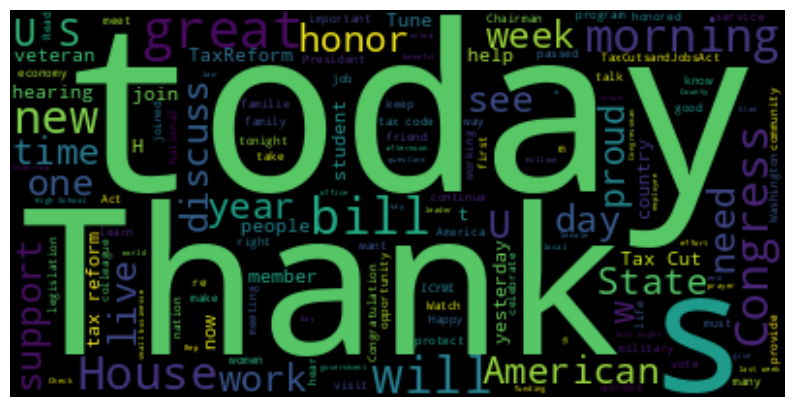

In [12]:
words = ' '.join([tweet for tweet in republican_tweets['CleanedTweet']])
word_cloud = WordCloud(random_state = 42, max_font_size = 120).generate(words)

plt.figure(figsize=(10, 10))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='Classify_P', ylabel='count'>

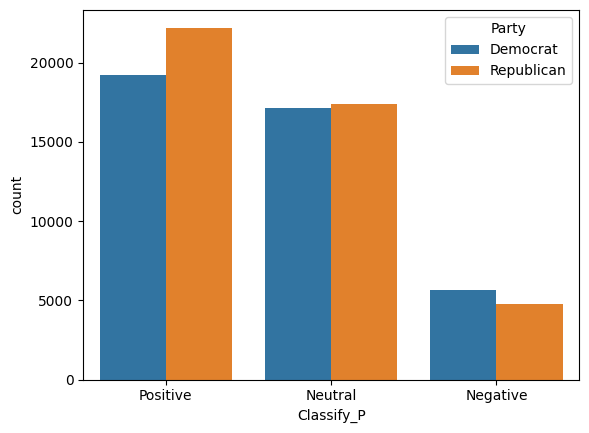

In [13]:
sns.countplot(x = "Classify_P", hue = 'Party', data = tweets)

<Axes: xlabel='Classify_S', ylabel='count'>

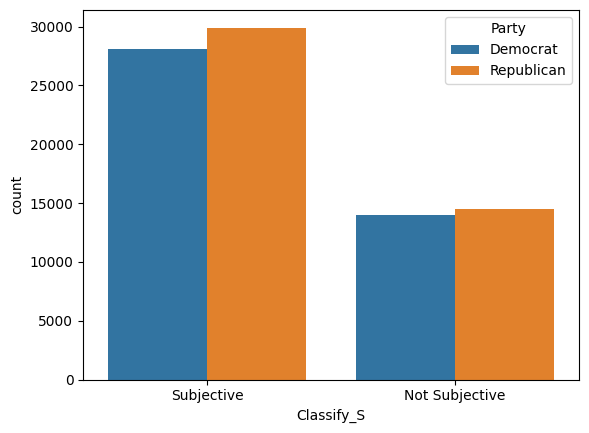

In [14]:
sns.countplot(x = "Classify_S", hue = 'Party', data = tweets)

In [15]:
dt_avg_sentiment = democract_tweets['Polarity'].mean()
dt_pct_subjective = democract_tweets[democract_tweets['Classify_S'] == 'Subjective'].shape[0] / democract_tweets.shape[0] * 100
rt_avg_sentiment = republican_tweets['Polarity'].mean()
rt_pct_subjective = republican_tweets[republican_tweets['Classify_S'] == 'Subjective'].shape[0] / republican_tweets.shape[0] * 100

print(f"Average Democrat Sentiment: {dt_avg_sentiment:.2f}, Demoract Subjective Tweet Percentage: {dt_pct_subjective:.2f}%")
print(f"Average Republican Sentiment: {rt_avg_sentiment:.2f}, Republican Subjective Tweet Percentage: {rt_pct_subjective:.2f}%")

Average Democrat Sentiment: 0.14, Demoract Subjective Tweet Percentage: 66.78%
Average Republican Sentiment: 0.17, Republican Subjective Tweet Percentage: 67.39%


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE


In [17]:
# Select features and target
X = tweets[['Subjectivity', 'Polarity']]  # You can add more features here
y = tweets['Party']

# Encode the target variable
y = y.map({'Democrat': 0, 'Republican': 1})  # Adjust according to your data

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature selection using RFE
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=2)  # Adjust the number of features as needed
fit = rfe.fit(X_train, y_train)

# Selecting the top features
selected_features = X_train.columns[fit.support_]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Build and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_selected, y_train)

# Make predictions
y_pred = logreg.predict(X_test_selected)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5229393168324467
Confusion Matrix:
 [[ 2628 10032]
 [ 2342 10936]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.21      0.30     12660
           1       0.52      0.82      0.64     13278

    accuracy                           0.52     25938
   macro avg       0.53      0.52      0.47     25938
weighted avg       0.53      0.52      0.47     25938



In [19]:
# Predict the probabilities on the test set
probabilities = logreg.predict_proba(X_test_selected)

# Get the predicted party (0 for Democrat, 1 for Republican)
predicted_party = logreg.predict(X_test_selected)

# Determine the overall predicted winner
# Count the number of each predicted class
predicted_counts = np.bincount(predicted_party)

# The party with the higher count is predicted to win
predicted_winner = np.argmax(predicted_counts)

# Map back to party names
party_map = {0: 'Democrat', 1: 'Republican'}
print(f"The predicted winning party is: {party_map[predicted_winner]}")


The predicted winning party is: Republican
